# Lecture 2.5 - Using external code with the import statment

We have already worked with external code using the import function, withouth much explanation:

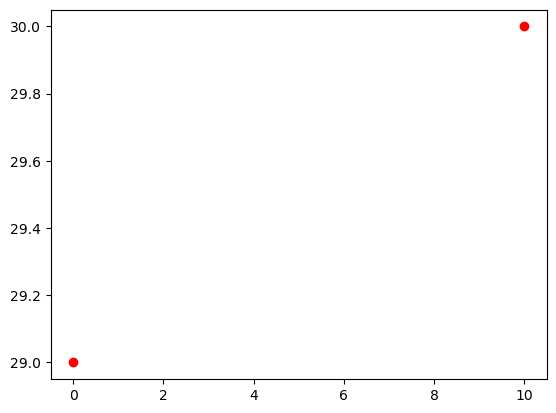

In [2]:
import matplotlib.pyplot as plt

plt.plot([0, 10], [29, 30], 'or')
plt.show()

So what is going on? Let's use a simpler example:

The `os` package allows you - among other things - to discover and manipulate directories and files.

To use the `os` package, we need to "import" it into the python memory. The general syntax for importing is

`import PACKAGE_NAME`

You can then access functions within the package using the dot notation: `PACKAGE_NAME.FUNCTION_NAME`

In [3]:
import os
os.getcwd()  # print the current working directory

'/Users/clemens10/Library/CloudStorage/Dropbox/code.lab/teaching/python course 2023/outline/Week 2 - more and functions'

Some packages contain modules. You also access them with dot notation: `PACKAGE_NAME.MODULE_NAME.FUNCTION_NAME`.
For instance, functions in the `os.path` module can by accessed like so:

In [4]:
import os
current_dir = os.getcwd()
print(f"{current_dir=}")
print(f"{os.path.split(current_dir)=}")

current_dir='/Users/janc/Library/CloudStorage/Dropbox/_teaching/neu715/neu715/lectures/lecture 2'
os.path.split(current_dir)=('/Users/janc/Library/CloudStorage/Dropbox/_teaching/neu715/neu715/lectures', 'lecture 2')


Sometimes, the modules need to be imported explicitely, with `import PACKAGE_NAME.MODULE_NAME`, for instance `import os.path`.

This is what we do when we call `import matplotlib.pyplot` - we import `pyplot` from the package `matplotlib`.

Referring to modules within packages can lead to long names or sometimes you want to use only a module. The `as` keyword allows you to define an alias: `import PACKAGE_NAME as ALIAS` or `import PACKAGE_NAME.MODULE_NAME as ALIAS`. 

You can then access all functions in the module using the alias:

In [5]:
import os.path as osp
print(osp.split(current_dir))  # this is equivalent to calling `os.path.split()`
print(os.path.split(current_dir))

('/Users/janc/Library/CloudStorage/Dropbox/_teaching/neu715/neu715/lectures', 'lecture 2')
('/Users/janc/Library/CloudStorage/Dropbox/_teaching/neu715/neu715/lectures', 'lecture 2')


That's exactly what we're doing when import matplotlib - we want to use all functions in the `pyplot` module of the `matplotlib` package.

We could import it via `import matplotlib.pyplot`, but then the code for plotting would be very long:

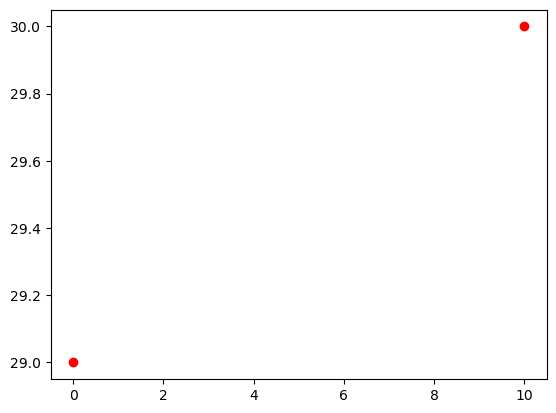

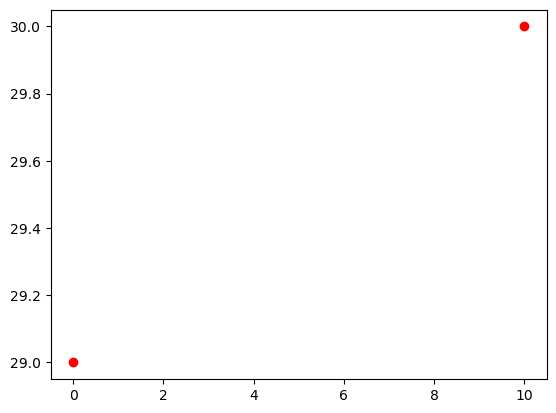

In [7]:
import matplotlib.pyplot

matplotlib.pyplot.plot([0, 10], [29, 30], 'or')
matplotlib.pyplot.show()


# the above is the same as:
import matplotlib.pyplot as alias

alias.plot([0, 10], [29, 30], 'or')
alias.show()

The `as plt` provides a shortcut, for accessing everything under `matplotlib.pyplot` through the much shorter `plt`.

If you try to import sth that does not exist, you will get an error:

In [4]:
import dream

ModuleNotFoundError: No module named 'dream'

Here are common aliases everyone in the python world uses - if you use these packages, import them the same as everyone else so that others understand your code more easily.

In [8]:
import matplotlib.pyplot as plt  # you used these already
import numpy as np  # next week!
import pandas as pd  # in two weeks!


Just for completeness, there is another way of importing: `from PACKAGE_NAME import MODULE_NAME`.

With that you can access functions using the module name:

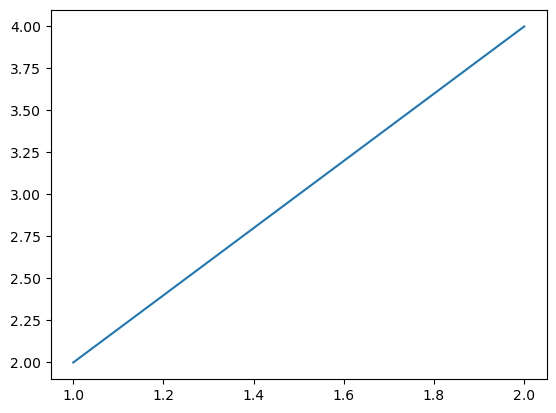

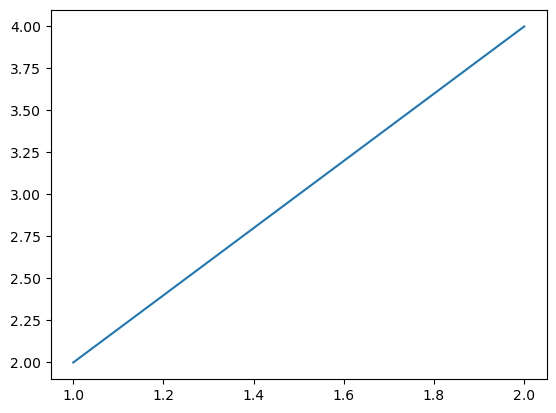

In [11]:
from matplotlib import pyplot
pyplot.plot([1, 2],[2, 4])
pyplot.show()

# Can also be combined with an alias
from matplotlib import pyplot as plt22
plt22.plot([1, 2],[2, 4])
plt22.show()

### Importing your own code
So far, everything happened inside a single notebook.

But what if we want to re-use our own code across notebooks, for instance the `mean` or `concat` functions?

Well, any python code file (ending inn `.py`) is a module.

We can save the code to a python code file, with the ending `.py` and import it!
Note that the file needs to be in the same directory as the notebook you import it into. There are ways around this but we will not cover this here.

Say we have this function for getting the max from a list:

In [7]:
def my_max_local(data):
    max_val = None
    for d in data:
        if max_val is None or d > max_val:
            max_val = d
    return max_val

my_max_local([12, 23, 54, 1, 45])

54

If we want to re-use this function in a different notebook, we'd have to copy the code to a cell in the new notebook. This is tedious and clutters the notebook.

Instead, we can save the function to a python file and import it:

- open a text editor (get a good one that has syntax highlighting etc - I use visual studio code)
- open a new, empty file
- copy the function text to that file
- rename the function from `my_max_local` to `my_max`
- save it in the same folder as the current notebook, under the name: `my_functions.py`. It is important to save it to the same folder - otherwise python will not be able to find the file!!

In [ ]:
import my_functions
print(my_functions.my_max([12, 23, 54, 1, 45])) # call the imported function

print(my_max_local([12, 23, 54, 1, 45]))  # call the local function

What if we don't want to type `my_functions`, every time we want to use `my_max`?

In [9]:
import my_functions as mf  # will import the my_max function for direct use
mf.my_max([12, 23, 54, 1, 45])

54

In [15]:
from my_functions import my_max  # will import the my_max function for direct use
my_max([12, 23, 54, 1, 45])

54

In [16]:
from my_functions import *  # will import all functions in the file `my_functions.py` for direct use
my_max([12, 23, 54, 1, 45])

54

__Caution__ Once you've imported a function, any changes to it will not be reflected immediately in the code. This is because when python encounters an import statement, it "checks" whether this package/module has been imported before and will only import it if it has not been imported before. You have to restart the notebook kernel and import the module again to use changed code.

In [ ]:
# code example